In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# 1. Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

# 3. Define parameter grid
param_grid = {
    'pca__n_components': [2, 3],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

# 4. GridSearchCV
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)

# 5. Results
print("Best parameters found:", grid.best_params_)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))


Best parameters found: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'pca__n_components': 3}
Best cross-validation score: 0.96
Test set score: 1.00


Check for 3 fold, 5 fold and 7 fold cross validation

Replace classifier, SVC with RandomForestClassifier and LogisticRegression, Perceptron, knn .

Update the param_grid accordingly (e.g., for RandomForestClassifier, use n_estimators, max_depth, etc.)

Also replace Gridsearch with randomnsearch function.

Relplace with with your own csv dataset using code below:

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 1. Load your uploaded dataset
data = pd.read_csv("/content/Iris.csv")

# 2. Drop the ID column if it exists
if 'Id' in data.columns:
    data = data.drop('Id', axis=1)

# 3. Separate features and target
X = data.drop("Species", axis=1)  # Features
y = data["Species"]               # Target

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 6. Hyperparameter grid
param_dist = {
    'pca__n_components': [2, 3],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, None],
    'classifier__min_samples_split': [2, 4, 6]
}

# 7. Randomized Search with 5-fold CV
search = RandomizedSearchCV(pipe, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
search.fit(X_train, y_train)

# 8. Results
print("Best Parameters Found:")
print(search.best_params_)
print("\nBest Cross-Validation Score: {:.2f}".format(search.best_score_))
print("Test Set Accuracy: {:.2f}".format(search.score(X_test, y_test)))


Best Parameters Found:
{'pca__n_components': 3, 'classifier__n_estimators': 50, 'classifier__min_samples_split': 2, 'classifier__max_depth': 5}

Best Cross-Validation Score: 0.93
Test Set Accuracy: 1.00


In [23]:
#Step 1: Try with Different Classifiers
#a. K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_dist = {
    'pca__n_components': [2, 3],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}


In [24]:
#b.Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

param_dist = {
    'pca__n_components': [2, 3],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}


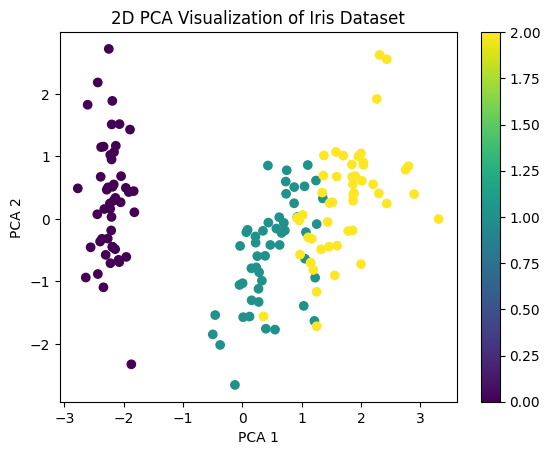

In [25]:
#Step 2: Visualize PCA Output

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype('category').cat.codes, cmap='viridis')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("2D PCA Visualization of Iris Dataset")
plt.colorbar()
plt.show()


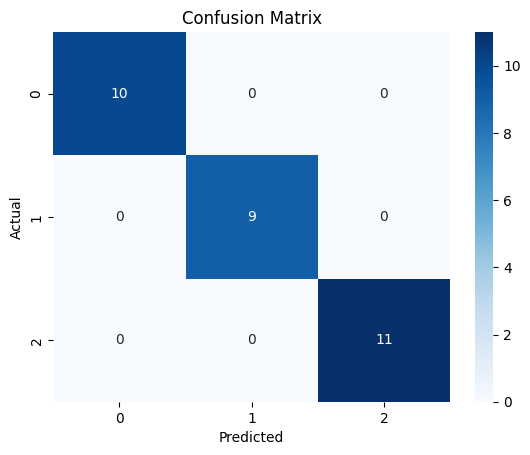

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [26]:
#Step 3: Evaluate with Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


In [27]:
#Step 4: Use Another Dataset
#1. Load the dataset:
import pandas as pd

data = pd.read_csv("/content/pd_speech_features.csv")  # or correct path if different


In [17]:
#2. Check the column names:
print(data.columns)


Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)


In [18]:
#3. Split X and y:
X = data.drop("class", axis=1)  # assuming "class" is the target column
y = data["class"]


In [20]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# 1. Load data and train model
data = pd.read_csv("/content/Iris.csv")
X = data.drop(["Id", "Species"], axis=1)
y = data["Species"]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('model', RandomForestClassifier(n_estimators=50, max_depth=5))
])
pipe.fit(X, y)

# 2. Predict function
def predict(sepal_length, sepal_width, petal_length, petal_width):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = pipe.predict(input_data)[0]
    return f"Predicted Species: {prediction}"

# 3. Build Gradio UI
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width")
    ],
    outputs="text",
    title="Iris Species Predictor"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://266160c3cf814bc030.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
